# Manual K-Means Algorithm

In [39]:
import seaborn as sns
import matplotlib as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from numpy.random import default_rng

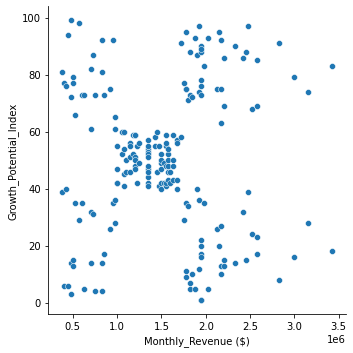

In [40]:
data = pd.read_csv("applied-data-orig.csv")
data = data[["Monthly_Revenue ($)", "Growth_Potential_Index"]]

sns.relplot(x = "Monthly_Revenue ($)", y = "Growth_Potential_Index", data = data)

In [59]:
def get_distance(u, v):
    if len(u) == len(v):
        sumsq = 0
        for index in range(0, len(u)):
            sumsq += (u[index] - v[index]) ** 2
        return np.sqrt(sumsq)
    else:
        return np.nan

def normalize_vector(vector, minVal = 0, maxVal = 1):
    std = [(x - min(vector)) / (max(vector) - min(vector)) for x in vector]
    scaled = [x * (maxVal - minVal) + minVal for x in std]
    return scaled

def assign_clusters(centroids_df, normalized_df):
    normalized_df["min_distance"] = np.inf
    normalized_df["distance"] = np.nan
    normalized_df["cluster"] = -1

    for cluster, centroid in centroids_df.iterrows():
        normalized_df["distance"] = get_distance([normalized_df["x"], normalized_df["y"]], [centroid["x"], centroid["y"]])
        normalized_df["min_distance"] = normalized_df[["min_distance", "distance"]].min(axis = 1)
        normalized_df.loc[normalized_df["min_distance"] == normalized_df["distance"], "cluster"] = cluster

    return normalized_df[["x", "y", "cluster"]]


def run_kmeans(df_raw, k, max_iter = 100):
    df = pd.DataFrame()
    df["x"] = normalize_vector(df_raw.iloc[:, 0])
    df["y"] = normalize_vector(df_raw.iloc[:, 1])

    centroids = pd.DataFrame(columns = ["x", "y", "cluster"])

    # create a new, randomly-placed centroid for each cluster (1-k)
    rng = default_rng()
    for cluster in range(1, k + 1):
        xPos = rng.uniform(min(df["x"]), max(df["x"]))
        yPos = rng.uniform(min(df["y"]), max(df["y"]))
        centroids = centroids.append({"x": xPos, "y": yPos, "cluster": cluster}, ignore_index = True)

    # initial grouping
    df = assign_clusters(centroids, df)
    
    ## iteration (check to see if centroids have changed position; may do for and break when difference is 0):
    for iter in range(0, max_iter):
        moved = False
        # find COM of each cluster's actual data points
        # move centroid to its cluster's COM
        for cluster, centroid in centroids.iterrows():
            oldPos = list(centroid[["x", "y"]])
            centroid["x"] = np.mean(df.loc[df["cluster"] == cluster, "x"])
            centroid["y"] = np.mean(df.loc[df["cluster"] == cluster, "y"])
            if oldPos != list(centroid[["x", "y"]]):
                moved = True
        # if centroids haven't moved, break off the loop
        if moved == False:
            break
        # update groups
        df = assign_clusters(centroids, df)

    return df, centroids, iter

        

4


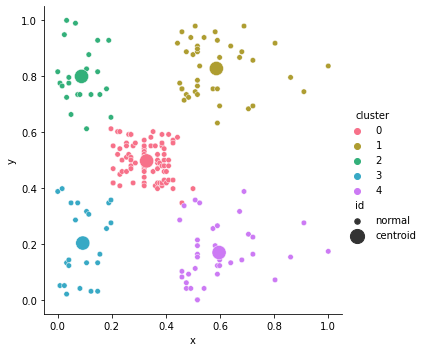

In [69]:
df, centroids, iter = run_kmeans(data, 5)

print(iter) # how many times did the centroids have to move?

df["id"] = "normal"

centroids["cluster"] = centroids.index
centroids["id"] = "centroid"

df_v = df.append(centroids, ignore_index = True)

sns.relplot(x = "x", y = "y", hue = "cluster", size = "id", sizes = (200, 30), palette = sns.color_palette("husl", 5), data = df_v)

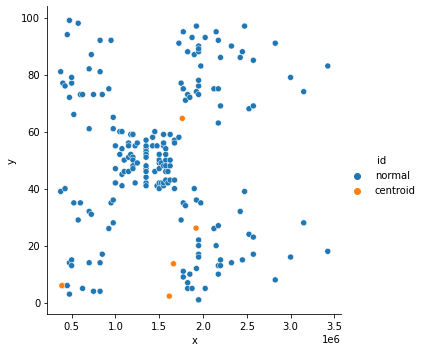

In [49]:
data1 = pd.DataFrame()
data1["x"] = data.iloc[:, 0]
data1["y"] = data.iloc[:, 1]
data1["id"] = "normal"

centroids = run_kmeans(data, 5)
centroids["id"] = "centroid"

data1 = data1.append(centroids, ignore_index = True)

sns.relplot(x = "x", y = "y", hue = "id", data = data1)